# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Anak Agung Ngurah Bagus Dwimantara
- **Email:** a008yam058@devacademy.com
- **ID Dicoding:** ajus_dwimantara

## Menentukan Pertanyaan Bisnis

- Which location has the most and least level of online purchases? Is there a geolocation factor?
- What is the impact of customer reviews on the sales level of each store?
- What is the impact of less product detail to the sales level of each store?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

## Data Wrangling

### Gathering Data

#### customers_df

In [2]:
customers_df = pd.read_csv('E-Commerce Public Dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### geolocation_df

In [3]:
geolocation_df = pd.read_csv('E-Commerce Public Dataset/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### order_items_df

In [4]:
order_items_df = pd.read_csv('E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### order_payments_df

In [13]:
order_payments_df = pd.read_csv('E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### order_reviews_df

In [6]:
order_reviews_df = pd.read_csv('E-Commerce Public Dataset/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### orders_df

In [7]:
orders_df = pd.read_csv('E-Commerce Public Dataset/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### product_category_df

In [8]:
product_category_df = pd.read_csv('E-Commerce Public Dataset/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### products_df

In [9]:
products_df = pd.read_csv('E-Commerce Public Dataset/products_dataset.csv')

# Convert translation table into a dictionary
translation_dict = dict(zip(product_category_df["product_category_name"], product_category_df["product_category_name_english"]))

# Apply translation using replace or map
products_df["product_category_name"] = products_df["product_category_name"].map(translation_dict)

products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### sellers_df

In [10]:
sellers_df = pd.read_csv('E-Commerce Public Dataset/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- The information about the sales of each product is obtained
- The information about the location of each seller and customer is obtained
- The information about the shipping cost is obtained
- The information about customer reviews is obtained

### Assessing Data

#### customers_df

In [22]:
# check datatype
print(customers_df.info())
# Check missing value
print(f"Missing value: \n{customers_df.isna().sum()}")
# Check duplicate
print("N duplicates: ", customers_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
Missing value: 
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
N duplicates:  0


**Insight:**
- in this data, there is no statistical value. Thus, calling describe() function is unneccessary.

#### geolocation_df

In [23]:
# check datatype
print(geolocation_df.info())
# Check missing value
print(f"Missing value: \n{geolocation_df.isna().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None
Missing value: 
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [24]:
# Check statistical value
print(geolocation_df.describe())

# Check duplicate
print("N duplicated: ", geolocation_df.duplicated().sum())

       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02
N duplicated:  261831


#### order_items_df

In [31]:
# check datatype
print(order_items_df.info())
# Check missing value
print(f"Missing value: \n{order_items_df.isna().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
Missing value: 
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [32]:
# Check statistical value
print(order_items_df.describe())

# Check duplicate
print("N duplicated: ", order_items_df.duplicated().sum())

       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000
N duplicated:  0


#### order_payments_df

In [33]:
# check datatype
print(order_payments_df.info())
# Check missing value
print(f"Missing value: \n{order_payments_df.isna().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
Missing value: 
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [34]:
# Check statistical value
print(order_payments_df.describe())

# Check duplicate
print("N duplicated: ", order_payments_df.duplicated().sum())

       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000
N duplicated:  0


In [ ]:
# Check whether 24 payment_installments is reasonable
order_payments_df[order_payments_df["payment_installments"]==24]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
2970,70b7e94ea46d3e8b5bc12a50186edaf0,1,credit_card,24,274.84
10791,859f516f2fc3f95772e63c5757ab0d5b,1,credit_card,24,609.56
12307,ff36cbc44b8f228e0449c92ef089c843,1,credit_card,24,756.49
18512,2b7dbe9be72b8f9733844c31055c0825,1,credit_card,24,345.39
21713,6ae2e8b8fac02522481d2a2f4ca4412c,1,credit_card,24,433.43
23024,90f864fe19d11549fa01eb81c4dd87e3,1,credit_card,24,588.58
36088,84d2098c97827c6327ed4d7be95e1fc8,1,credit_card,24,286.78
50401,ffb18bf111fa70edf316eb0390427986,1,credit_card,24,617.24
52846,63dbe0c8e63e5f1b4deec09d4f044a7f,1,credit_card,24,771.69
55094,fcbb6af360b31b05460c2c8e524588c0,1,credit_card,24,1194.38


In [ ]:
# Check whether 29 payment_sequential is reasonable
order_payments_df[order_payments_df["payment_sequential"]==24]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51816,ccf804e764ed5650cd8759557269dc13,24,voucher,1,2.79
99213,fa65dad1b0e818e3ccc5cb0e39231352,24,voucher,1,0.42


#### order_reviews_df

In [36]:
# check datatype
print(order_reviews_df.info())
# Check missing value
print(f"Missing value: \n{order_reviews_df.isna().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None
Missing value: 
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [37]:
# Check statistical value
print(order_reviews_df.describe())

# Check duplicate
print("N duplicated: ", order_reviews_df.duplicated().sum())

       review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
N duplicated:  0


#### orders_df

In [38]:
# check datatype
print(order_items_df.info())
# Check missing value
print(f"Missing value: \n{order_items_df.isna().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
Missing value: 
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [39]:
# Check statistical value
print(order_items_df.describe())

# Check duplicate
print("N duplicated: ", order_items_df.duplicated().sum())

       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000
N duplicated:  0


- products_df

In [40]:
# check datatype
print(products_df.info())
# Check missing value
print(f"Missing value: \n{products_df.isna().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None
Missing value: 
product_id                      0
product_category_name         623
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g      

In [41]:
# Check statistical value
print(products_df.describe())

# Check duplicate
print("N duplicated: ", products_df.duplicated().sum())

       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.0

#### sellers_df

In [42]:
# check datatype
print(sellers_df.info())
# Check missing value
print(f"Missing value: \n{sellers_df.isna().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None
Missing value: 
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


In [47]:
# Check duplicate
print("N duplicated: ", sellers_df.duplicated().sum())

N duplicated:  0


**Insight:**
- geolocation_df has 261831 duplicated values
- order_review_df has lots of missing value for the review comment. However, the data will be kept since the review stars are needed for this analysis
- products_df has lots of missing value for the product detail. However, this will be analyzed in this analysis

### Cleaning Data

#### Cleaning duplicated values in geolocation_df

In [62]:
# Remove duplicated
geolocation_df.drop_duplicates(inplace=True)

geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [63]:
# Check again
print(geolocation_df.describe())
print("N duplicated: ", geolocation_df.duplicated().sum())

       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                738332.000000    738332.000000    738332.000000
mean                  38316.086800       -20.998353       -46.461098
std                   30632.496675         5.892315         4.393705
min                    1001.000000       -36.605374      -101.466766
25%                   12600.000000       -23.603061       -48.867822
50%                   29144.000000       -22.873588       -46.647278
75%                   65950.000000       -19.923336       -43.836974
max                   99990.000000        45.065933       121.105394
N duplicated:  0


**Insight:**
- geolocation_df does not contain duplicated value anymore

## Exploratory Data Analysis (EDA)

#### Explore customers_df, sellers_df, geolocation_df, and orders_df

In [439]:
# customers + geolocation
customers_geo_df = customers_df.merge(geolocation_df, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="inner")
customers_geo_df.drop(columns=["geolocation_zip_code_prefix"], inplace=True)
customers_geo_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.515413,-47.398194,franca,SP
...,...,...,...,...,...,...,...,...,...
10327723,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.823236,-49.247423,aparecida de goiania,GO
10327724,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.823261,-49.247368,aparecida de goiânia,GO
10327725,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.821866,-49.244027,aparecida de goiania,GO
10327726,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.821692,-49.245116,aparecida de goiania,GO


In [443]:
customers_geo_count = customers_geo_df.groupby(["geolocation_lat", "geolocation_lng"]).size().reset_index(name="customer_count").sort_values(by="customer_count", ascending=False)
customers_geo_count

,geolocation_lat,geolocation_lng,customer_count
335950,-22.899404,-43.108537,368
333759,-22.903533,-43.115982,320
334508,-22.902263,-43.109812,320
333974,-22.903186,-43.115658,282
334539,-22.902219,-43.107025,248
...,...,...,...
663511,-6.788291,-43.032384,1
663513,-6.788251,-43.035508,1
83872,-25.500138,-54.568895,1
413278,-22.291784,-48.514902,1


In [437]:
# sellers + geolocation
sellers_geo_df = sellers_df.merge(geolocation_df, left_on="seller_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="inner")
sellers_geo_df.drop(columns=["geolocation_zip_code_prefix"], inplace=True)
sellers_geo_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.898536,-47.063125,campinas,SP
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.895499,-47.061944,campinas,SP
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.891740,-47.060820,campinas,SP
3,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.895762,-47.066144,campinas,SP
4,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.896154,-47.062431,campinas,SP
...,...,...,...,...,...,...,...,...
311784,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,-23.011130,-45.592347,taubate,SP
311785,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,-23.013452,-45.584299,taubaté,SP
311786,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,-23.009155,-45.592019,taubate,SP
311787,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,-23.009019,-45.584925,taubate,SP


In [444]:
sellers_geo_count = sellers_geo_df.groupby(["geolocation_lat", "geolocation_lng"]).size().reset_index(name="seller_count").sort_values(by="seller_count", ascending=False)
sellers_geo_count

,geolocation_lat,geolocation_lng,seller_count
134379,-21.768909,-48.824168,49
135467,-21.744612,-48.815226,49
135031,-21.757538,-48.838270,49
135107,-21.756066,-48.826300,49
135034,-21.757482,-48.823207,49
...,...,...,...
76156,-23.498252,-46.421857,1
76154,-23.498257,-46.852436,1
76153,-23.498259,-46.500775,1
76152,-23.498260,-46.427125,1


In [254]:
# customers + orders
customer_order_df = customers_df.merge(orders_df, on="customer_id", how="left")
customer_order_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


In [255]:
# pivot table customer_city with order_id
order_per_city = customer_order_df.groupby(by="customer_city").order_id.count().sort_values(ascending=False).reset_index()
order_per_city.head()

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521


### Explore customers, orders, sellers and products

In [ ]:
# orders + reviews + products
order_details_df = orders_df.merge(order_reviews_df, on="order_id", how="left")
order_details_df = order_details_df.merge(order_items_df, on="order_id", how="left")
order_products_df = order_details_df.merge(products_df, on="product_id", how="left")

# Pivot table to get the score description for each product
score_per_product = order_products_df.groupby(by="product_id").agg({
    "order_id": "count",
    "review_score" : ["max", "min", "mean"],
}).reset_index()

score_per_product

product_id order_id review_score          
                                           count          max  min mean
0      00066f42aeeb9f3007548bb9d3f33c38        1          5.0  5.0  5.0
1      00088930e925c41fd95ebfe695fd2655        1          4.0  4.0  4.0
2      0009406fd7479715e4bef61dd91f2462        1          1.0  1.0  1.0
3      000b8f95fcb9e0096488278317764d19        2          5.0  5.0  5.0
4      000d9be29b5207b54e86aa1b1ac54872        1          5.0  5.0  5.0
...                                 ...      ...          ...  ...  ...
32946  fff6177642830a9a94a0f2cba5e476d1        2          5.0  4.0  4.5
32947  fff81cc3158d2725c0655ab9ba0f712c        1          4.0  4.0  4.0
32948  fff9553ac224cec9d15d49f5a263411f        1          5.0  5.0  5.0
32949  fffdb2d0ec8d6a61f0a0a0db3f25b441        5          5.0  5.0  5.0
32950  fffe9eeff12fcbd74a2f2b007dde0c58        1          4.0  4.0  4.0

[32951 rows x 5 columns]

- Now let's see the impact of review score on seller sales

In [ ]:
# Pivot table to get the order of each seller
seller_orders_df = order_details_df.merge(sellers_df, on="seller_id", how="left")

score_per_store = seller_orders_df.groupby(by="seller_id").agg({
    "order_id": "count",
    "review_score": ["max", "min", "mean"]
}).reset_index()

score_per_store

seller_id order_id review_score               
                                          count          max  min      mean
0     0015a82c2db000af6aaaf3ae2ecb0532        3          5.0  1.0  3.666667
1     001cca7ae9ae17fb1caed9dfb1094831      239          5.0  1.0  3.902542
2     001e6ad469a905060d959994f1b41e4f        1          1.0  1.0  1.000000
3     002100f778ceb8431b7a1020ff7ab48f       56          5.0  1.0  3.982143
4     003554e2dce176b5555353e4f3555ac8        1          5.0  5.0  5.000000
...                                ...      ...          ...  ...       ...
3090  ffcfefa19b08742c5d315f2791395ee5        1          1.0  1.0  1.000000
3091  ffdd9f82b9a447f6f8d4b91554cc7dd3       20          5.0  1.0  4.250000
3092  ffeee66ac5d5a62fe688b9d26f83f534       14          5.0  1.0  4.214286
3093  fffd5413c0700ac820c7069d66d98c89       61          5.0  1.0  3.866667
3094  ffff564a4f9085cd26170f4732393726       20          5.0  1.0  2.100000

[3095 rows x 5 columns]

In [ ]:
#  order_items + products
product_order_df = order_items_df.merge(products_df, on="product_id", how="left")

product_order_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [311]:
product_order_df.groupby(by="product_id").order_id.count().sort_values(ascending=False)

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ... 
6ca99f05e9c1952a6597264e87f01378      1
6ca54e191592a843087a042b0665d7ef      1
6ca5428af5edb5066b1966ad58501b60      1
6ca32b4631431cb1fe976880797a0f5c      1
fffe9eeff12fcbd74a2f2b007dde0c58      1
Name: order_id, Length: 32951, dtype: int64

**Insight:**
- The city with max and min level of sales can be obtained.
- The geolocation of each customer or seller can be obtained.
- The relation between reviews and sales level can be obtained.
- The data about order detail can be related to the sales level of each product.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Which location has the most and least level of online purchases? Is there a geolocation factor?

In [259]:
# Check the sales on each city
order_per_city.head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


C:\Users\ajusd\AppData\Local\Temp\ipykernel_15324\1607717854.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


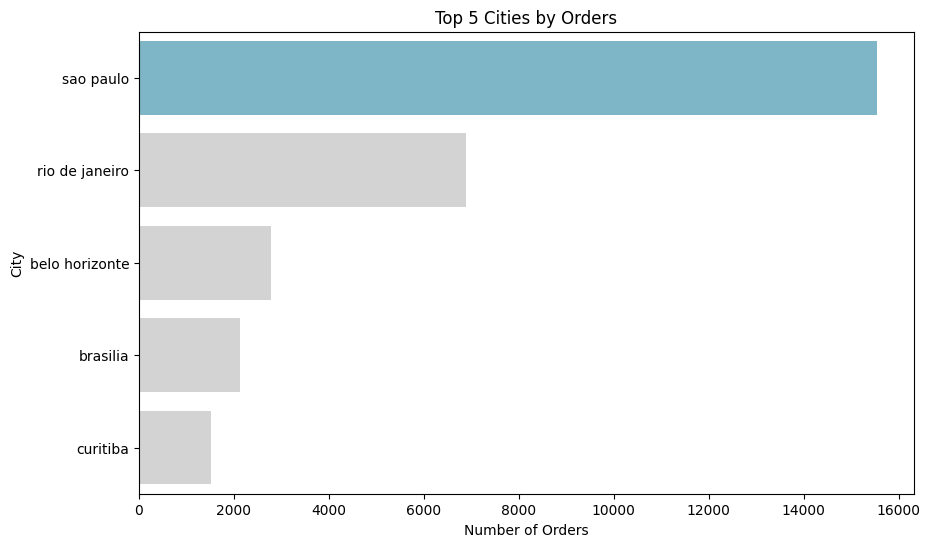

In [499]:
# Visualize from the most sales city

# Plot
plt.figure(figsize=(10, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

top_5_cities = order_per_city.head(5)

sns.barplot(
    data=order_per_city.head(5), 
    y="customer_city", 
    x="order_id", 
    palette=colors
)

plt.xlabel("Number of Orders")
plt.ylabel("City")
plt.title("Top 5 Cities by Orders")
plt.show()

In [ ]:
# Since the most sales city is obtained, only the fewest customer on each city is searched
least_orders = order_per_city.iloc[-1]["order_id"]
least_city = order_per_city[order_per_city["order_id"]==least_orders]["customer_city"].tolist()
print(f"Least city: {least_city} with {least_orders} orders")

Least city: ['acucena', 'sao nicolau', 'alexandrita', 'sao miguel do cambui', 'trabiju', 'caxingo', 'vieiras', 'caxambu do sul', 'alfredo marcondes', 'cotipora', 'areial', 'bacaxa', 'sao patricio', 'vila bela da santissima trindade', 'castanheiras', 'vicosa do ceara', 'cassia dos coqueiros', 'caseiros', 'cascalho rico', 'xexeu', 'sao pedro da agua branca', 'baguari', 'alianca', 'vicentina', 'vicente dutra', 'sao pedro do butia', 'tracuateua', 'sao miguel do anta', 'sao pedro do iguacu', 'cotegipe', 'sao lourenco do piaui', 'cezarina', 'cerro negro', 'avai', 'traipu', 'cerro grande', 'alcantara', 'cerrito', 'cerejeiras', 'centro novo do maranhao', 'sao luiz do norte', 'centralina', 'trombas', 'sao mamede', 'central de santa helena', 'central', 'centenario', 'alegrete do piaui', 'alegria', 'sao mateus de minas', 'alexandra', 'ceilandia', 'cedro do abaete', 'cedro', 'sao miguel das matas', 'sao miguel do aleixo', 'vila flor', 'abdon batista', 'arraial d ajuda', 'cha de alegria', 'alto bel

- From that data, there are lots of cities with one sale only

In [257]:
# Check how many city with one sale
print(f"Number of one-sale cities: {len(least_city)}")

Number of one-sale cities: 1144


- Since there are lots of one sale level, the geolocation for the location can be analyzed

### Pertanyaan 2: What is the impact of customer reviews on the sales level of each store?

- Classify the products into bad and good products

In [451]:
bad_product = score_per_product[(score_per_product["review_score"]["mean"] <= 3.0)]

sales_per_bad_product = bad_product["order_id"].sum()/bad_product["product_id"].nunique()

sales_bad_product = bad_product["order_id"].sum()

print(sales_bad_product)
print(sales_per_bad_product) 

count    13652
dtype: int64
count    1.984014
dtype: float64


In [452]:
good_product = score_per_product[(score_per_product["review_score"]["mean"] > 3.0)]

sales_per_good_product = good_product["order_id"].sum()/good_product["product_id"].nunique()

sales_good_product = good_product["order_id"].sum()

print(sales_good_product)
print(sales_per_good_product)

count    99455
dtype: int64
count    3.838776
dtype: float64


C:\Users\ajusd\AppData\Local\Temp\ipykernel_15324\2888790672.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  "Total Sales": [float(sales_good_product), float(sales_bad_product)]
C:\Users\ajusd\AppData\Local\Temp\ipykernel_15324\2888790672.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product Review", y="Total Sales", data=plot_data, palette=["green", "red"])


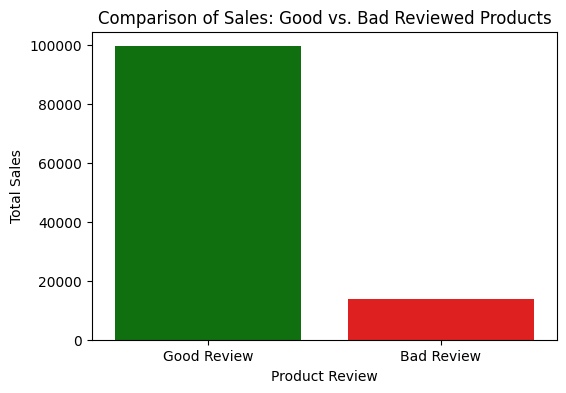

In [ ]:
# Create the bar plot to compare the total sales
plot_data = pd.DataFrame({
    "Product Review": ["Good Review", "Bad Review"],
    "Total Sales": [float(sales_good_product), float(sales_bad_product)]
})
plt.figure(figsize=(6, 4))
sns.barplot(x="Product Review", y="Total Sales", data=plot_data, palette=["green", "red"])

# Add labels and title
plt.xlabel("Product Review")
plt.ylabel("Total Sales")
plt.title("Comparison of Total Sales: Good vs. Bad Reviewed Products")

# Show the plot
plt.show()

C:\Users\ajusd\AppData\Local\Temp\ipykernel_15324\329734595.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  "Total Sales": [float(sales_per_good_product), float(sales_per_bad_product)]
C:\Users\ajusd\AppData\Local\Temp\ipykernel_15324\329734595.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product Review", y="Total Sales", data=plot_data, palette=["green", "red"])


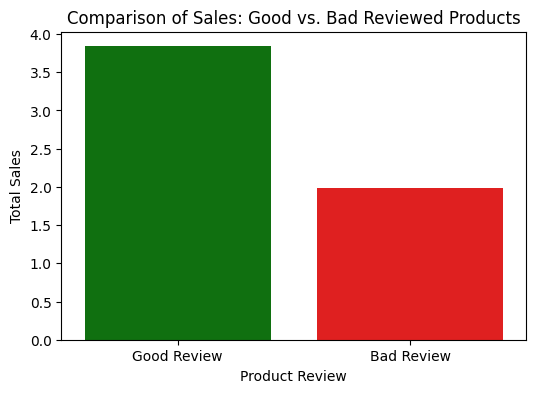

In [ ]:
# Create the bar plot to compare the average sales
plot_data = pd.DataFrame({
    "Product Review": ["Good Review", "Bad Review"],
    "Total Sales": [float(sales_per_good_product), float(sales_per_bad_product)]
})
plt.figure(figsize=(6, 4))
sns.barplot(x="Product Review", y="Total Sales", data=plot_data, palette=["green", "red"])

# Add labels and title
plt.xlabel("Product Review")
plt.ylabel("Total Sales")
plt.title("Comparison of Average Sales: Good vs. Bad Reviewed Products")

# Show the plot
plt.show()

- Classify based on the review score (i.e. one to five)

In [466]:
one_star_product = score_per_product[(score_per_product["review_score"]["mean"] >= 1.0) & (score_per_product["review_score"]["mean"] <= 1.5)]

sales_per_one_star_product = one_star_product["order_id"].sum()/one_star_product["product_id"].nunique()

sales_one_star_product = one_star_product["order_id"].sum()

print(sales_one_star_product)
print(sales_per_one_star_product) 

count    3765
dtype: int64
count    1.357735
dtype: float64


In [467]:
two_star_product = score_per_product[(score_per_product["review_score"]["mean"] > 1.5) & (score_per_product["review_score"]["mean"] <= 2.5)]

sales_per_two_star_product = two_star_product["order_id"].sum()/two_star_product["product_id"].nunique()

sales_two_star_product = two_star_product["order_id"].sum()

print(sales_two_star_product)
print(sales_per_two_star_product) 

count    3508
dtype: int64
count    2.531025
dtype: float64


In [468]:
three_star_product = score_per_product[(score_per_product["review_score"]["mean"] > 2.5) & (score_per_product["review_score"]["mean"] <= 3.5)]

sales_per_three_star_product = three_star_product["order_id"].sum()/three_star_product["product_id"].nunique()

sales_three_star_product = three_star_product["order_id"].sum()

print(sales_three_star_product)
print(sales_per_three_star_product) 

count    13940
dtype: int64
count    3.597419
dtype: float64


In [469]:
four_star_product = score_per_product[(score_per_product["review_score"]["mean"] > 3.5) & (score_per_product["review_score"]["mean"] <= 4.5)]

sales_per_four_star_product = four_star_product["order_id"].sum()/four_star_product["product_id"].nunique()

sales_four_star_product = four_star_product["order_id"].sum()

print(sales_four_star_product)
print(sales_per_four_star_product) 

count    60446
dtype: int64
count    6.578082
dtype: float64


In [470]:
five_star_product = score_per_product[(score_per_product["review_score"]["mean"] > 4.5) & (score_per_product["review_score"]["mean"] <= 5.0)]

sales_per_five_star_product = five_star_product["order_id"].sum()/five_star_product["product_id"].nunique()

sales_five_star_product = five_star_product["order_id"].sum()

print(sales_five_star_product)
print(sales_per_five_star_product) 

count    31448
dtype: int64
count    2.020301
dtype: float64


C:\Users\ajusd\AppData\Local\Temp\ipykernel_15324\2725191236.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  "Total Sales": [float(sales_one_star_product), float(sales_two_star_product), float(sales_three_star_product), float(sales_four_star_product), float(sales_five_star_product)]
C:\Users\ajusd\AppData\Local\Temp\ipykernel_15324\2725191236.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product Review", y="Total Sales", data=plot_data, palette=["red", "red", "yellow", "green", "green"])


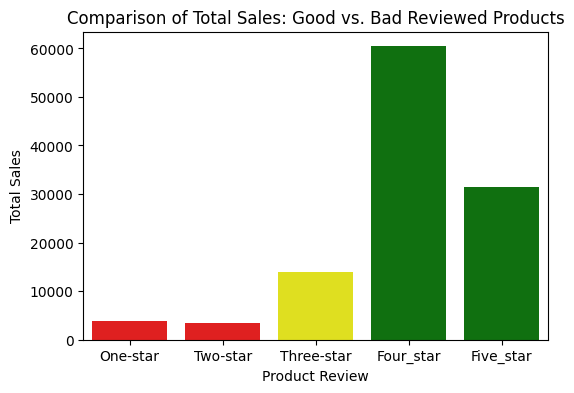

In [471]:
# Create the bar plot to compare the total sales for each product
plot_data = pd.DataFrame({
    "Product Review": ["One-star", "Two-star", "Three-star", "Four_star", "Five_star"],
    "Total Sales": [float(sales_one_star_product), float(sales_two_star_product), float(sales_three_star_product), float(sales_four_star_product), float(sales_five_star_product)]
})
plt.figure(figsize=(6, 4))
sns.barplot(x="Product Review", y="Total Sales", data=plot_data, palette=["red", "red", "yellow", "green", "green"])

# Add labels and title
plt.xlabel("Product Review")
plt.ylabel("Total Sales")
plt.title("Comparison of Total Sales: Good vs. Bad Reviewed Products")

# Show the plot
plt.show()

C:\Users\ajusd\AppData\Local\Temp\ipykernel_15324\3925526136.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  "Total Sales": [float(sales_per_one_star_product), float(sales_per_two_star_product), float(sales_per_three_star_product), float(sales_per_four_star_product), float(sales_per_five_star_product)]
C:\Users\ajusd\AppData\Local\Temp\ipykernel_15324\3925526136.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product Review", y="Total Sales", data=plot_data, palette=["red", "red", "yellow", "green", "green"])


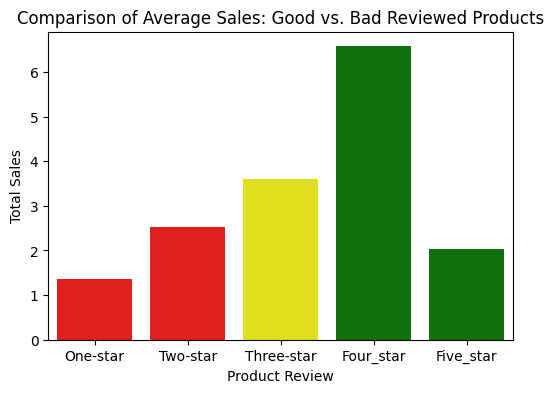

In [472]:
# Create the bar plot to compare the average sales for each product
plot_data = pd.DataFrame({
    "Product Review": ["One-star", "Two-star", "Three-star", "Four_star", "Five_star"],
    "Total Sales": [float(sales_per_one_star_product), float(sales_per_two_star_product), float(sales_per_three_star_product), float(sales_per_four_star_product), float(sales_per_five_star_product)]
})
plt.figure(figsize=(6, 4))
sns.barplot(x="Product Review", y="Total Sales", data=plot_data, palette=["red", "red", "yellow", "green", "green"])

# Add labels and title
plt.xlabel("Product Review")
plt.ylabel("Total Sales")
plt.title("Comparison of Average Sales: Good vs. Bad Reviewed Products")

# Show the plot
plt.show()

- Classify the sellers based on the review score

In [473]:
one_star_store = score_per_store[(score_per_store["review_score"]["mean"] >= 1.0) & (score_per_store["review_score"]["mean"] <= 1.5)]

sales_per_one_star_store = one_star_store["order_id"].sum()/one_star_store["seller_id"].nunique()

sales_one_star_store = one_star_store["order_id"].sum()

print(sales_one_star_store)
print(sales_per_one_star_store) 

count    320
dtype: int64
count    1.987578
dtype: float64


In [474]:
two_star_store = score_per_store[(score_per_store["review_score"]["mean"] > 1.5) & (score_per_store["review_score"]["mean"] <= 2.5)]

sales_per_two_star_store = two_star_store["order_id"].sum()/two_star_store["seller_id"].nunique()

sales_two_star_store = two_star_store["order_id"].sum()

print(sales_two_star_store)
print(sales_per_two_star_store) 

count    688
dtype: int64
count    5.733333
dtype: float64


In [475]:
three_star_store = score_per_store[(score_per_store["review_score"]["mean"] > 2.5) & (score_per_store["review_score"]["mean"] <= 3.5)]

sales_per_three_star_store = three_star_store["order_id"].sum()/three_star_store["seller_id"].nunique()

sales_three_star_store = three_star_store["order_id"].sum()

print(sales_three_star_store)
print(sales_per_three_star_store) 

count    7281
dtype: int64
count    20.982709
dtype: float64


In [476]:
four_star_store = score_per_store[(score_per_store["review_score"]["mean"] > 3.5) & (score_per_store["review_score"]["mean"] <= 4.5)]

sales_per_four_star_store = four_star_store["order_id"].sum()/four_star_store["seller_id"].nunique()

sales_four_star_store = four_star_store["order_id"].sum()

print(sales_four_star_store)
print(sales_per_four_star_store) 

count    97598
dtype: int64
count    61.266792
dtype: float64


In [477]:
five_star_store = score_per_store[(score_per_store["review_score"]["mean"] > 4.5) & (score_per_store["review_score"]["mean"] <= 5.0)]

sales_per_five_star_store = five_star_store["order_id"].sum()/five_star_store["seller_id"].nunique()

sales_five_star_store = five_star_store["order_id"].sum()

print(sales_five_star_store)
print(sales_per_five_star_store) 

count    7422
dtype: int64
count    8.540852
dtype: float64


C:\Users\ajusd\AppData\Local\Temp\ipykernel_15324\208328842.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  "Total Sales": [float(sales_per_one_star_store), float(sales_per_two_star_store), float(sales_per_three_star_store), float(sales_per_four_star_store), float(sales_per_five_star_store)]
C:\Users\ajusd\AppData\Local\Temp\ipykernel_15324\208328842.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Store Review", y="Total Sales", data=plot_data, palette=["red", "red", "yellow", "green", "green"])


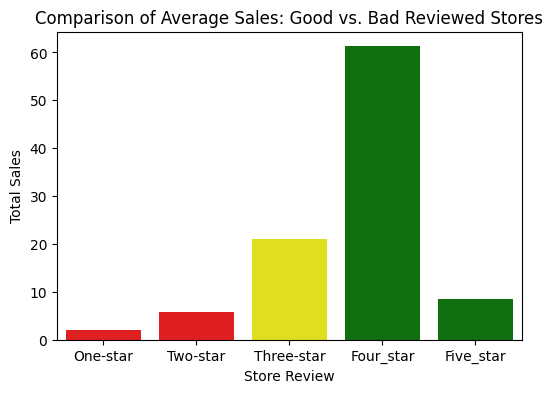

In [478]:
# Create the bar plot to compare the average sales
plot_data = pd.DataFrame({
    "Store Review": ["One-star", "Two-star", "Three-star", "Four_star", "Five_star"],
    "Total Sales": [float(sales_per_one_star_store), float(sales_per_two_star_store), float(sales_per_three_star_store), float(sales_per_four_star_store), float(sales_per_five_star_store)]
})
plt.figure(figsize=(6, 4))
sns.barplot(x="Store Review", y="Total Sales", data=plot_data, palette=["red", "red", "yellow", "green", "green"])

# Add labels and title
plt.xlabel("Store Review")
plt.ylabel("Total Sales")
plt.title("Comparison of Average Sales: Good vs. Bad Reviewed Stores")

# Show the plot
plt.show()

C:\Users\ajusd\AppData\Local\Temp\ipykernel_15324\4163296816.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  "Total Sales": [float(sales_one_star_store), float(sales_two_star_store), float(sales_three_star_store), float(sales_four_star_store), float(sales_five_star_store)]
C:\Users\ajusd\AppData\Local\Temp\ipykernel_15324\4163296816.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Store Review", y="Total Sales", data=plot_data, palette=["red", "red", "yellow", "green", "green"])


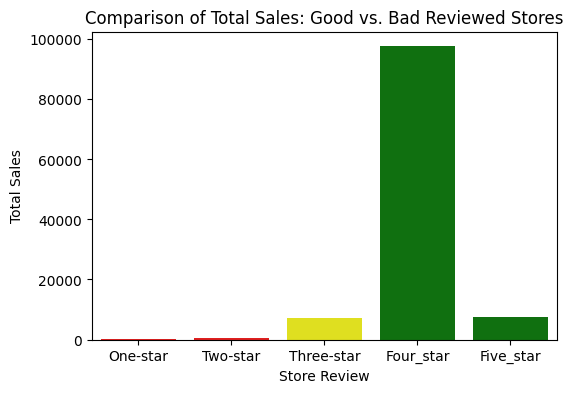

In [479]:
# Create the bar plot to compare the total sales
plot_data = pd.DataFrame({
    "Store Review": ["One-star", "Two-star", "Three-star", "Four_star", "Five_star"],
    "Total Sales": [float(sales_one_star_store), float(sales_two_star_store), float(sales_three_star_store), float(sales_four_star_store), float(sales_five_star_store)]
})
plt.figure(figsize=(6, 4))
sns.barplot(x="Store Review", y="Total Sales", data=plot_data, palette=["red", "red", "yellow", "green", "green"])

# Add labels and title
plt.xlabel("Store Review")
plt.ylabel("Total Sales")
plt.title("Comparison of Total Sales: Good vs. Bad Reviewed Stores")

# Show the plot
plt.show()

## Pertanyaan 3: What is the impact of less product detail to the sales level of each store?

In [320]:
# Get all the products with NaN in its detailed description
non_detailed_products = product_order_df[product_order_df.isna().any(axis=1)]

non_detailed_products

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
123,0046e1d57f4c07c8c92ab26be8c3dfc0,1,ff6caf9340512b8bf6d2a2a6df032cfa,38e6dada03429a47197d5d584d793b41,2017-10-02 15:49:17,7.79,7.78,NaN,NaN,NaN,NaN,200.0,16.0,5.0,12.0
125,00482f2670787292280e0a8153d82467,1,a9c404971d1a5b1cbc2e4070e02731fd,702835e4b785b67a084280efca355756,2017-02-17 16:18:07,7.60,10.96,NaN,NaN,NaN,NaN,700.0,35.0,14.0,11.0
132,004f5d8f238e8908e6864b874eda3391,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-03-06 09:29:25,122.99,15.61,NaN,NaN,NaN,NaN,400.0,20.0,12.0,15.0
142,0057199db02d1a5ef41bacbf41f8f63b,1,41eee23c25f7a574dfaf8d5c151dbb12,e5a3438891c0bfdb9394643f95273d8e,2018-01-25 09:07:51,20.30,16.79,NaN,NaN,NaN,NaN,200.0,16.0,2.0,11.0
171,006cb7cafc99b29548d4f412c7f9f493,1,e10758160da97891c2fdcbc35f0f031d,323ce52b5b81df2cd804b017b7f09aa7,2018-02-22 13:35:28,56.00,14.14,NaN,NaN,NaN,NaN,2200.0,16.0,2.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112306,ff24fec69b7f3d30f9dc1ab3aee7c179,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-02-01 02:40:12,122.99,15.61,NaN,NaN,NaN,NaN,400.0,20.0,12.0,15.0
112333,ff3024474be86400847879103757d1fd,1,f9b1795281ce51b1cf39ef6d101ae8ab,3771c85bac139d2344864ede5d9341e3,2017-11-21 03:55:39,39.90,9.94,NaN,NaN,NaN,NaN,400.0,32.0,15.0,15.0
112350,ff3a45ee744a7c1f8096d2e72c1a23e4,1,b61d1388a17e3f547d2bc218df02335b,07017df32dc5f2f1d2801e579548d620,2017-05-10 10:15:19,139.00,21.42,NaN,NaN,NaN,NaN,350.0,16.0,6.0,11.0
112438,ff7b636282b98e0aa524264b295ed928,1,431df35e52c10451171d8037482eeb43,6cd68b3ed6d59aaa9fece558ad360c0a,2018-02-22 15:35:35,49.90,15.11,NaN,NaN,NaN,NaN,475.0,21.0,15.0,21.0


In [510]:
# Get its reviews
non_detailed_review = non_detailed_products.merge(order_reviews_df, on="order_id", how="left")

non_detailed_review = non_detailed_review.groupby(by="product_id").agg({
    "review_score": ["max", "min", "mean"]
}).reset_index()

non_detailed_review

product_id review_score               
                                               max  min      mean
0    0082684bb4a60a862baaf7a60a5845ed          4.0  4.0  4.000000
1    00ab8a8b9fe219511dc3f178c6d79698          5.0  2.0  3.375000
2    00d62b338366db4c4aec8547ea8f928e          5.0  5.0  5.000000
3    0103863bf3441460142ec23c74388e4c          1.0  1.0  1.000000
4    0105b5323d24fc655f73052694dbbb3a          5.0  1.0  3.000000
..                                ...          ...  ...       ...
619  fedccbd5e370e8ddb7aae6fb4cb70347          5.0  5.0  5.000000
620  ff09b38ea3889c433325e313807936ea          5.0  5.0  5.000000
621  ff6caf9340512b8bf6d2a2a6df032cfa          5.0  1.0  2.333333
622  ff8bb42702f38636b348fd7e2332ce2f          4.0  4.0  4.000000
623  fff28f91211774864a1000f918ed00cc          1.0  1.0  1.000000

[624 rows x 4 columns]

In [321]:
# Get all the products that having description
detailed_products = product_order_df.dropna()

detailed_products

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computers_accessories,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports_leisure,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computers_accessories,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [512]:
# Get its reviews
detailed_review = detailed_products.merge(order_reviews_df, on="order_id", how="left")

detailed_review = detailed_review.groupby(by="product_id").agg({
    "review_score": ["max", "min", "mean"]
}).reset_index()

detailed_review

product_id review_score          
                                                 max  min mean
0      00066f42aeeb9f3007548bb9d3f33c38          5.0  5.0  5.0
1      00088930e925c41fd95ebfe695fd2655          4.0  4.0  4.0
2      0009406fd7479715e4bef61dd91f2462          1.0  1.0  1.0
3      000b8f95fcb9e0096488278317764d19          5.0  5.0  5.0
4      000d9be29b5207b54e86aa1b1ac54872          5.0  5.0  5.0
...                                 ...          ...  ...  ...
32322  fff6177642830a9a94a0f2cba5e476d1          5.0  4.0  4.5
32323  fff81cc3158d2725c0655ab9ba0f712c          4.0  4.0  4.0
32324  fff9553ac224cec9d15d49f5a263411f          5.0  5.0  5.0
32325  fffdb2d0ec8d6a61f0a0a0db3f25b441          5.0  5.0  5.0
32326  fffe9eeff12fcbd74a2f2b007dde0c58          4.0  4.0  4.0

[32327 rows x 4 columns]

C:\Users\ajusd\AppData\Local\Temp\ipykernel_15324\2603392329.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=detailed_review, y=detailed_review["review_score"]["mean"], ax=ax[0], palette="Set2")
C:\Users\ajusd\AppData\Local\Temp\ipykernel_15324\2603392329.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=non_detailed_review, y=non_detailed_review["review_score"]["mean"], ax=ax[1], palette="Set1")


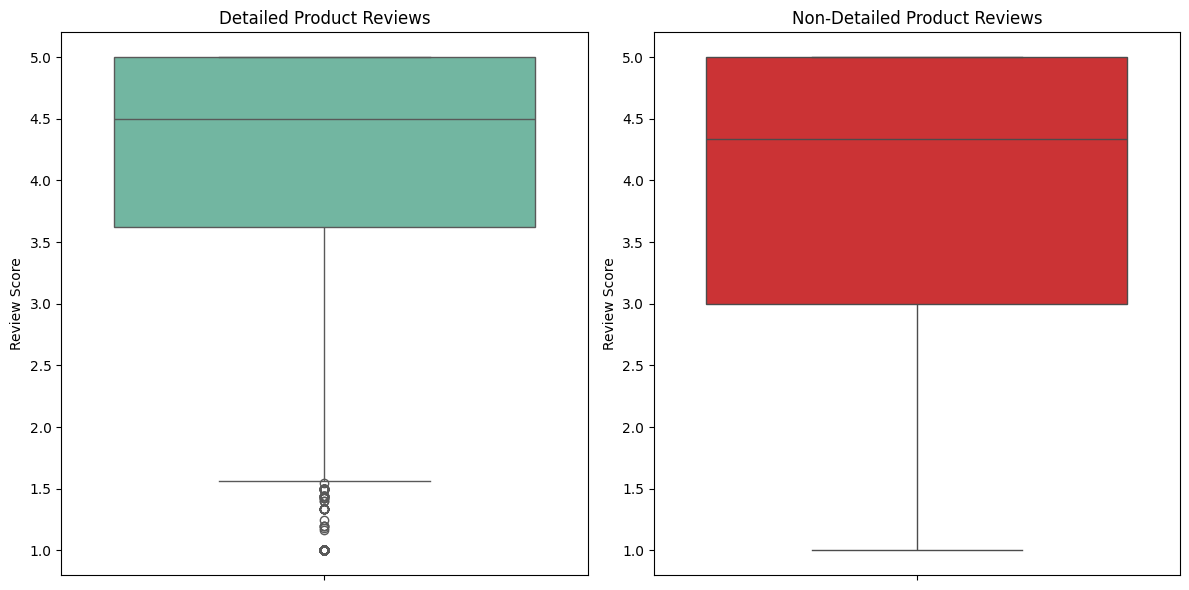

In [ ]:
# Create a boxplot with 1 row and 2 columns of subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for detailed_review
sns.boxplot(data=detailed_review, y=detailed_review["review_score"]["mean"], ax=ax[0], palette="Set2")
ax[0].set_title("Detailed Product Reviews")
ax[0].set_ylabel("Review Score")

# Boxplot for non_detailed_review
sns.boxplot(data=non_detailed_review, y=non_detailed_review["review_score"]["mean"], ax=ax[1], palette="Set1")
ax[1].set_title("Non-Detailed Product Reviews")
ax[1].set_ylabel("Review Score")

# Adjust layout
plt.tight_layout()
plt.show()

In [379]:
# Get the sales per product
non_detailed_sales = non_detailed_products.groupby(by="product_id").agg({
    "order_id": "count"
}).reset_index()

non_detailed_sales

,product_id,order_id
0,0082684bb4a60a862baaf7a60a5845ed,1
1,00ab8a8b9fe219511dc3f178c6d79698,8
2,00d62b338366db4c4aec8547ea8f928e,1
3,0103863bf3441460142ec23c74388e4c,1
4,0105b5323d24fc655f73052694dbbb3a,5
...,...,...
619,fedccbd5e370e8ddb7aae6fb4cb70347,3
620,ff09b38ea3889c433325e313807936ea,2
621,ff6caf9340512b8bf6d2a2a6df032cfa,3
622,ff8bb42702f38636b348fd7e2332ce2f,1


In [380]:
detailed_sales = detailed_products.groupby(by="product_id").agg({
    "order_id": "count"
}).reset_index()

detailed_sales

,product_id,order_id
0,00066f42aeeb9f3007548bb9d3f33c38,1
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,1
3,000b8f95fcb9e0096488278317764d19,2
4,000d9be29b5207b54e86aa1b1ac54872,1
...,...,...
32322,fff6177642830a9a94a0f2cba5e476d1,2
32323,fff81cc3158d2725c0655ab9ba0f712c,1
32324,fff9553ac224cec9d15d49f5a263411f,1
32325,fffdb2d0ec8d6a61f0a0a0db3f25b441,5


C:\Users\ajusd\AppData\Local\Temp\ipykernel_15324\1820834462.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_data, x="Product Type", y="Sales Value", palette=["green", "red"])


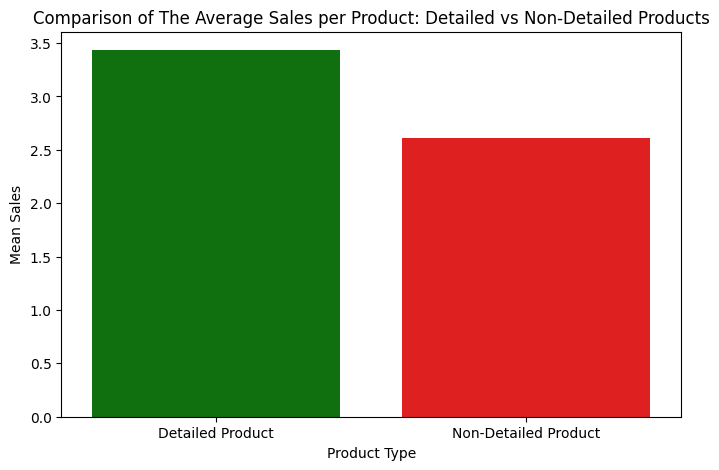

In [450]:
# Compute mean sales
detailed_mean_sales = detailed_sales["order_id"].mean()
non_detailed_mean_sales = non_detailed_sales["order_id"].mean()

# Create a DataFrame for plotting
sales_data = pd.DataFrame({
    "Product Type": ["Detailed Product", "Non-Detailed Product"],
    "Sales Value": [detailed_mean_sales, non_detailed_mean_sales]
})

# Plot using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(data=sales_data, x="Product Type", y="Sales Value", palette=["green", "red"])

# Add labels and title
plt.xlabel("Product Type")
plt.ylabel("Mean Sales")
plt.title("Comparison of The Average Sales per Product: Detailed vs Non-Detailed Products")

# Show the plot
plt.show()

**Insight:**
- The data of which city has the most customers is obtained
- The analysis of why lots of cities only having one customer can be performed
- The relation between sales per store and total sales with review scores are clearly obtained
- The relation between sales per store and total sales with product details are clearly obtained

## Analisis Lanjutan (Opsional)

#### Utilizing Geospatial Analysis

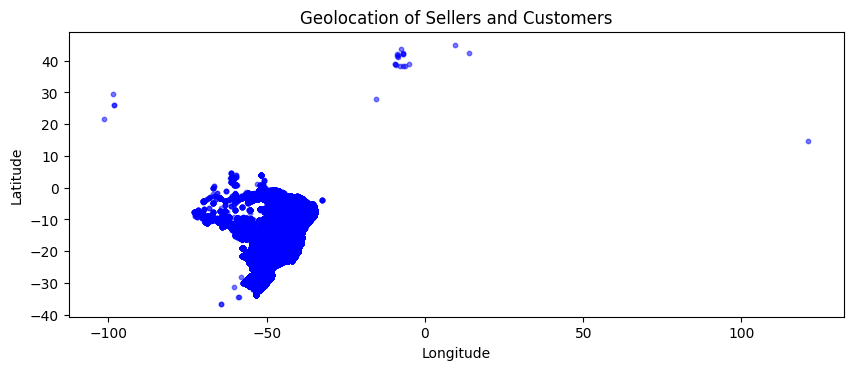

In [480]:

# Convert to GeoDataFrame
geolocation_gdf = gpd.GeoDataFrame(
    geolocation_df, 
    geometry=gpd.points_from_xy(geolocation_df["geolocation_lng"], geolocation_df["geolocation_lat"])
)

# Set a coordinate reference system (CRS) - WGS 84
geolocation_gdf.set_crs(epsg=4326, inplace=True)

# Plot the locations
fig, ax = plt.subplots(figsize=(10, 6))
geolocation_gdf.plot(ax=ax, markersize=10, alpha=0.5, color="blue")

# Add labels and title
plt.title("Geolocation of Sellers and Customers")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

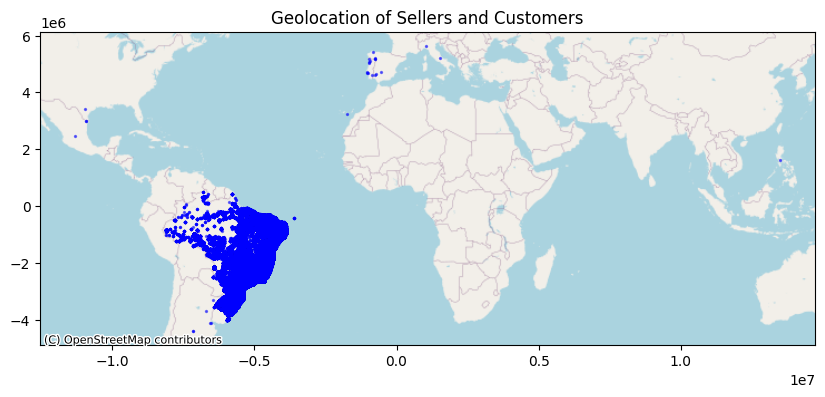

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
geolocation_gdf.to_crs(epsg=3857).plot(ax=ax, markersize=2, alpha=0.5, color="blue")

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

plt.title("Geolocation of Sellers and Customers")
plt.show()

- customers and sellers geolocation

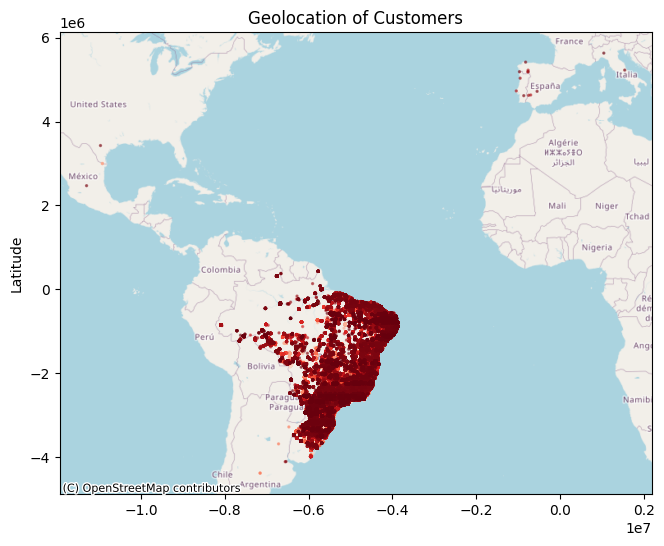

In [498]:
# Drop the same lat and lng to reduce the load time
customers_geo_df = customers_geo_df.drop_duplicates(subset=["geolocation_lat", "geolocation_lng"]).reset_index(drop=True)

# Convert to GeoDataFrame
customers_geolocation_gdf = gpd.GeoDataFrame(
    customers_geo_count, 
    geometry=gpd.points_from_xy(customers_geo_count["geolocation_lng"], customers_geo_count["geolocation_lat"])
)

# Set a coordinate reference system (CRS) - WGS 84
customers_geolocation_gdf.set_crs(epsg=4326, inplace=True)

# Plot the locations
fig, ax = plt.subplots(figsize=(10, 6))
# customers_geolocation_gdf.plot(ax=ax, markersize=5, alpha=0.5, cmap="Blues")

customers_geolocation_gdf.to_crs(epsg=3857).plot(ax=ax, markersize=2, alpha=0.5, cmap="Reds")

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
# Add labels and title
ax.set_title("Geolocation of Customers")
# ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
# ax.set_xticks([-150, 50])
# ax.set_yticks([-40, 50])

plt.show()

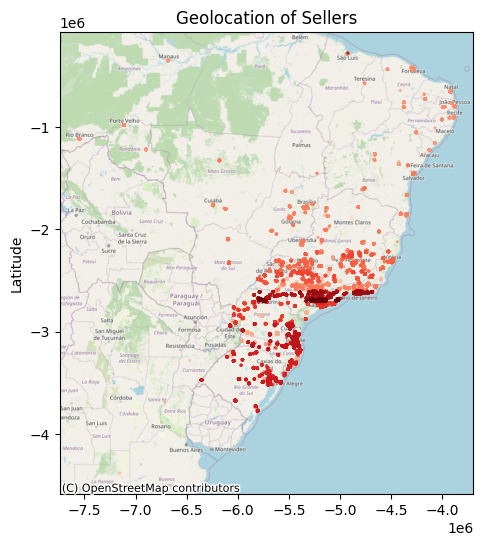

In [497]:
# Drop the same lat and lng to reduce the load time
# customers_geo_df = customers_geo_df.drop_duplicates(subset=["geolocation_lat", "geolocation_lng"]).reset_index(drop=True)

# Convert to GeoDataFrame
sellers_geolocation_gdf = gpd.GeoDataFrame(
    sellers_geo_count, 
    geometry=gpd.points_from_xy(sellers_geo_count["geolocation_lng"], sellers_geo_count["geolocation_lat"])
)

# Set a coordinate reference system (CRS) - WGS 84
sellers_geolocation_gdf.set_crs(epsg=4326, inplace=True)

# Plot the locations
fig, ax = plt.subplots(figsize=(10, 6))
# sellers_geolocation_gdf.plot(ax=ax, markersize=5, alpha=0.5, cmap="Blues")

sellers_geolocation_gdf.to_crs(epsg=3857).plot(ax=ax, markersize=2, alpha=0.5, cmap="Reds")

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
# Add labels and title
ax.set_title("Geolocation of Sellers")
# ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
# ax.set_xticks([-150, 50])
# ax.set_yticks([-40, 50])

plt.show()

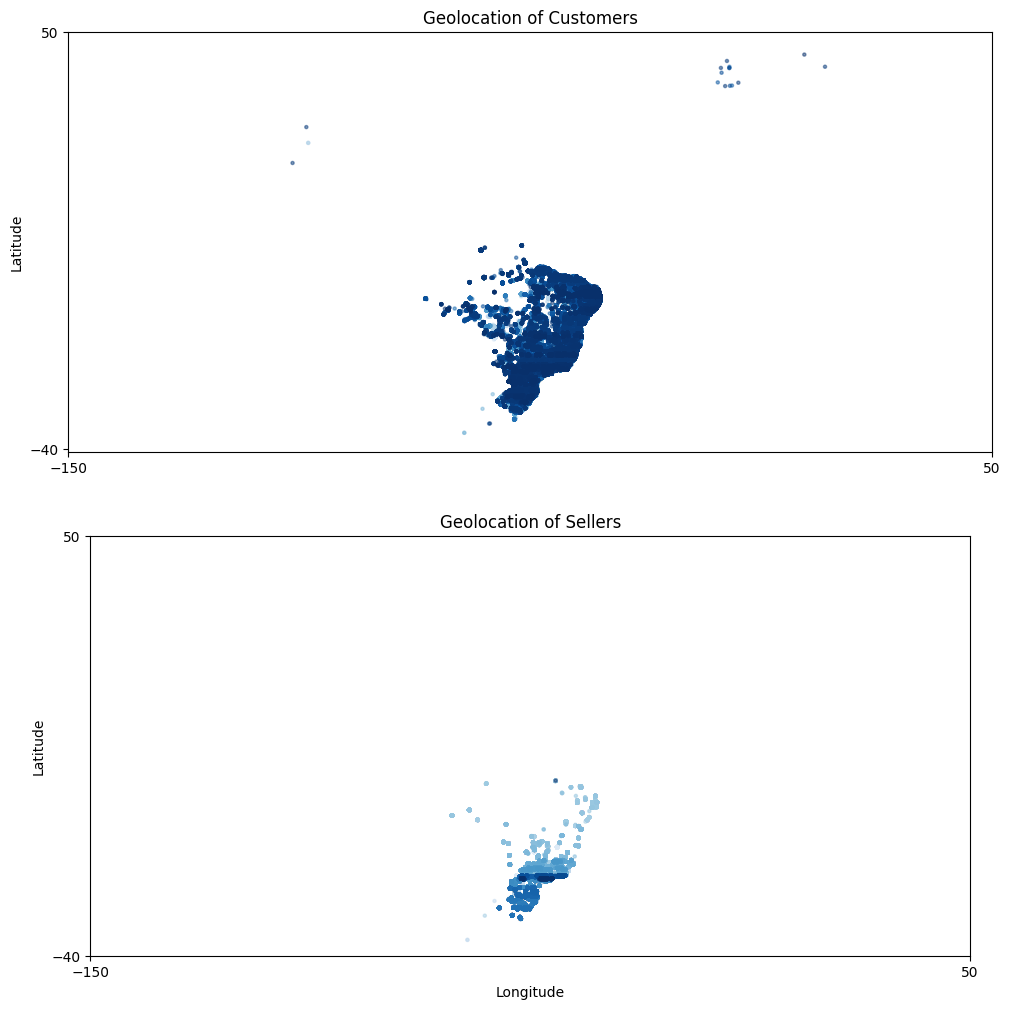

In [448]:
# Drop the same lat and lng to reduce the load time
customers_geo_df = customers_geo_df.drop_duplicates(subset=["geolocation_lat", "geolocation_lng"]).reset_index(drop=True)

# Convert to GeoDataFrame
customers_geolocation_gdf = gpd.GeoDataFrame(
    customers_geo_count, 
    geometry=gpd.points_from_xy(customers_geo_count["geolocation_lng"], customers_geo_count["geolocation_lat"])
)

# Set a coordinate reference system (CRS) - WGS 84
customers_geolocation_gdf.set_crs(epsg=4326, inplace=True)

# Drop the same lat and lng to reduce the load time
sellers_geo_df = sellers_geo_df.drop_duplicates(subset=["geolocation_lat", "geolocation_lng"]).reset_index(drop=True)

# Convert to GeoDataFrame
sellers_geolocation_gdf = gpd.GeoDataFrame(
    sellers_geo_count, 
    geometry=gpd.points_from_xy(sellers_geo_count["geolocation_lng"], sellers_geo_count["geolocation_lat"])
)

# Set a coordinate reference system (CRS) - WGS 84
sellers_geolocation_gdf.set_crs(epsg=4326, inplace=True)

# Plot the locations
fig, ax = plt.subplots(2, 1, figsize=(20, 12))
customers_geolocation_gdf.plot(ax=ax[0], markersize=5, alpha=0.5, cmap="Blues")
sellers_geolocation_gdf.plot(ax=ax[1], markersize=5, alpha=0.5, cmap="Blues")

# Add labels and title
ax[0].set_title("Geolocation of Customers")
# ax[0].set_xlabel("Longitude")
ax[0].set_ylabel("Latitude")
ax[0].set_xticks([-150, 50])
ax[0].set_yticks([-40, 50])

# Add labels and title
ax[1].set_title("Geolocation of Sellers")
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")
ax[1].set_xticks([-150, 50])
ax[1].set_yticks([-40, 50])

plt.show()


- geolocation of the least and top costumer city

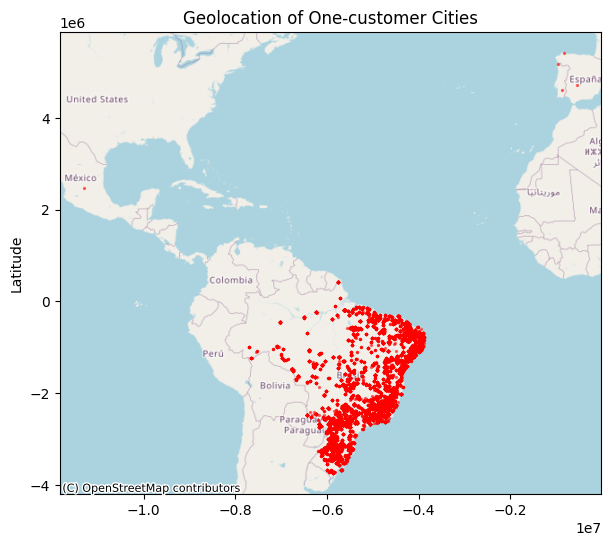

In [496]:
# Convert to GeoDataFrame
least_city_geo_df = geolocation_df[geolocation_df["geolocation_city"].isin(least_city)]

least_city_geolocation_gdf = gpd.GeoDataFrame(
    least_city_geo_df, 
    geometry=gpd.points_from_xy(least_city_geo_df["geolocation_lng"], least_city_geo_df["geolocation_lat"])
)

# Set a coordinate reference system (CRS) - WGS 84
least_city_geolocation_gdf.set_crs(epsg=4326, inplace=True)

# Plot the locations
fig, ax = plt.subplots(figsize=(10, 6))
# least_city_geolocation_gdf.plot(ax=ax, markersize=5, alpha=0.5, cmap="Blues")

least_city_geolocation_gdf.to_crs(epsg=3857).plot(ax=ax, markersize=2, alpha=0.5, color="red")

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
# Add labels and title
ax.set_title("Geolocation of One-customer Cities")
# ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
# ax.set_xticks([-150, 50])
# ax.set_yticks([-40, 50])

plt.show()

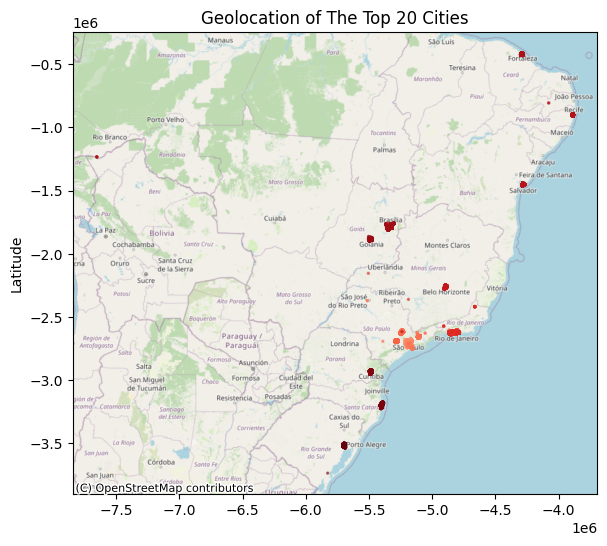

In [495]:
# Convert to GeoDataFrame
top_20_cities = order_per_city.head(20)

top_20_cities_geo_df = geolocation_df[geolocation_df["geolocation_city"].isin(top_20_cities["customer_city"])]

top_city_geolocation_gdf = gpd.GeoDataFrame(
    top_20_cities_geo_df, 
    geometry=gpd.points_from_xy(top_20_cities_geo_df["geolocation_lng"], top_20_cities_geo_df["geolocation_lat"])
)

# Set a coordinate reference system (CRS) - WGS 84
top_city_geolocation_gdf.set_crs(epsg=4326, inplace=True)

# Plot the locations
fig, ax = plt.subplots(figsize=(10, 6))
# top_city_geolocation_gdf.plot(ax=ax, markersize=5, alpha=0.5, cmap="Blues")

top_city_geolocation_gdf.to_crs(epsg=3857).plot(ax=ax, markersize=2, alpha=0.5, cmap="Reds")

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
# Add labels and title
ax.set_title("Geolocation of The Top 20 Cities")
# ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
# ax.set_xticks([-150, 50])
# ax.set_yticks([-40, 50])

plt.show()

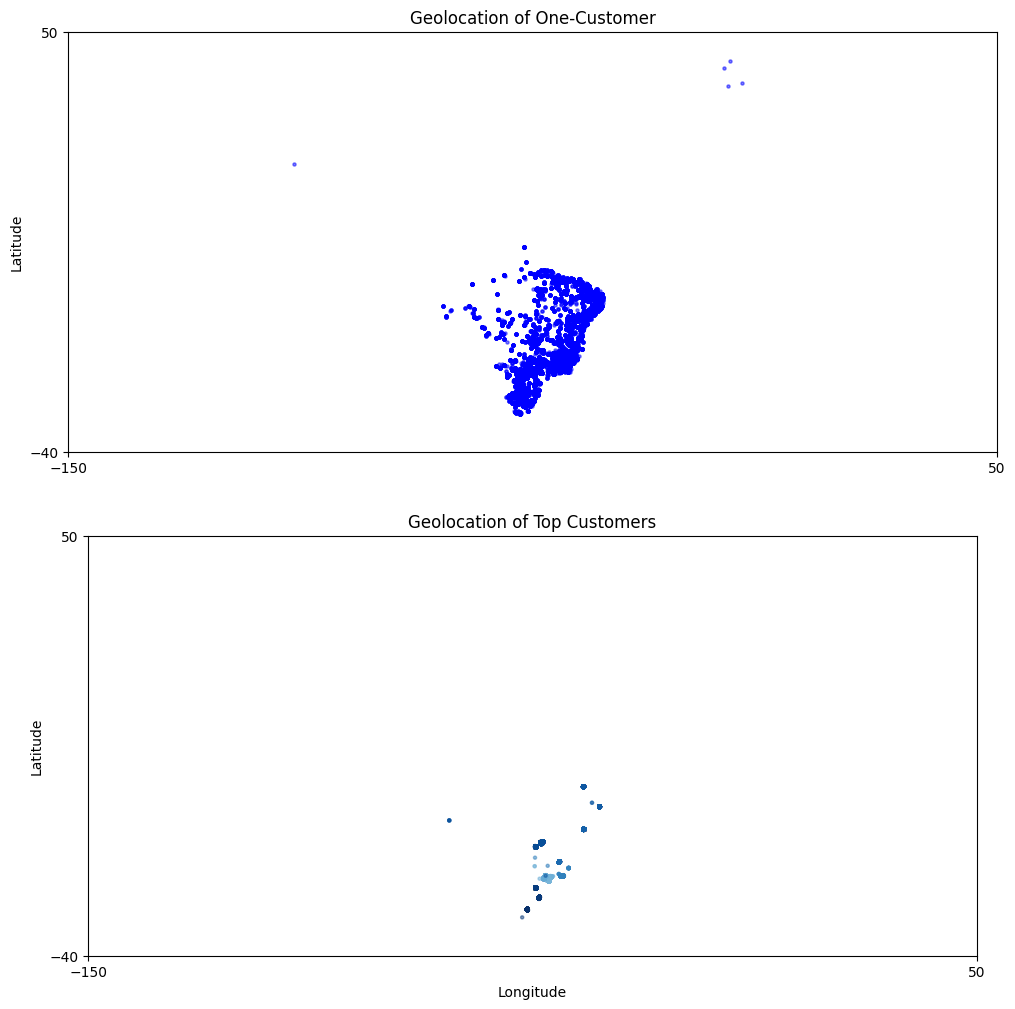

In [ ]:
# Get the least cities
least_city_geo_df = geolocation_df[geolocation_df["geolocation_city"].isin(least_city)]

# Convert to GeoDataFrame
least_city_geolocation_gdf = gpd.GeoDataFrame(
    least_city_geo_df, 
    geometry=gpd.points_from_xy(least_city_geo_df["geolocation_lng"], least_city_geo_df["geolocation_lat"])
)

# Set a coordinate reference system (CRS) - WGS 84
least_city_geolocation_gdf.set_crs(epsg=4326, inplace=True)


# Get the top 20 cities
top_20_cities = order_per_city.head(20)

top_20_cities_geo_df = geolocation_df[geolocation_df["geolocation_city"].isin(top_20_cities["customer_city"])]

# Convert to GeoDataFrame
top_city_geolocation_gdf = gpd.GeoDataFrame(
    top_20_cities_geo_df, 
    geometry=gpd.points_from_xy(top_20_cities_geo_df["geolocation_lng"], top_20_cities_geo_df["geolocation_lat"])
)

# Set a coordinate reference system (CRS) - WGS 84
top_city_geolocation_gdf.set_crs(epsg=4326, inplace=True)

# Plot the locations
fig, ax = plt.subplots(2, 1, figsize=(20, 12))
least_city_geolocation_gdf.plot(ax=ax[0], markersize=5, alpha=0.5, color="blue")
top_city_geolocation_gdf.plot(ax=ax[1], markersize=5, alpha=0.5, cmap="Blues")

# Add labels and title
ax[0].set_title("Geolocation of One-Customer")
# ax[0].set_xlabel("Longitude")
ax[0].set_ylabel("Latitude")
ax[0].set_xticks([-150, 50])
ax[0].set_yticks([-40, 50])

# Add labels and title
ax[1].set_title("Geolocation of Top Customers")
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")
ax[1].set_xticks([-150, 50])
ax[1].set_yticks([-40, 50])

plt.show()


In [520]:
# Convert df to csv
non_detailed_sales.to_csv("dashboard/non_detailed_product_sales.csv", index=False)
sellers_geo_count.to_csv("dashboard/sellers_geo_count.csv", index=False)
customers_geo_df.to_csv("dashboard/customers_geo_df.csv", index=False)
geolocation_df.to_csv("dashboard/geolocation_df.csv", index=False)
non_detailed_review.to_csv("dashboard/non_detailed_product_review.csv", index=False)
order_per_city.to_csv("dashboard/order_per_city.csv", index=False)
customers_geo_count.to_csv("dashboard/customers_geo_count.csv", index=False)
detailed_sales.to_csv("dashboard/detailed_product_sales.csv", index=False)
detailed_review.to_csv("dashboard/detailed_product_review.csv", index=False)
score_per_product.to_csv("dashboard/score_per_product.csv", index=False)
score_per_store.to_csv("dashboard/score_per_store.csv", index=False)

## Conclusion

- The city with most customers is sao paulo, following with rio de janeiro, belo horizonte, brasilia, curitiba. From the geospatial analysis, these top customers are mostly located on the south region. It seems that the significant reason of why lots of cities only having one customer can't clearly being seen.
- The product review score does affects the sales level of each product and of each sellers. The product with a good review, i.e., higher than 3.0, have a lot of sales rather than the product with bad review. This fact also the same for the sellers sales.
- A detailed information of each product does affect the average review score and sales per product. The products with a detailed information have a better average review score and sales per product.